# Uber-Trip-Analysis

In [1]:
# Import necessary libraries
import pandas as pd  # For data handling
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For better plots
from datetime import datetime  # For date-time processing

# Load the dataset
file_path = "Uber-Jan-Feb-FOIL.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Display the first few rows
print("First 5 rows of dataset:")
print(df.head())

# Display dataset info
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


First 5 rows of dataset:
  dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421
3                  B02682  1/1/2015              945   7679
4                  B02617  1/1/2015             1228   9537

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB
None

Missing values in each column:
dispatching_base_number    0
date                       0
active_vehicles          

In [4]:
print(df.columns)

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')


In [5]:
df['date'] = pd.to_datetime(df['date'])
print(df.info())  # Verify the new format


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips                    354 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 11.2+ KB
None


In [6]:
df['Hour'] = df['date'].dt.hour
df['Day'] = df['date'].dt.day
df['DayOfWeek'] = df['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['Month'] = df['date'].dt.month


# Plot number of trips per hour, colored by day of the week

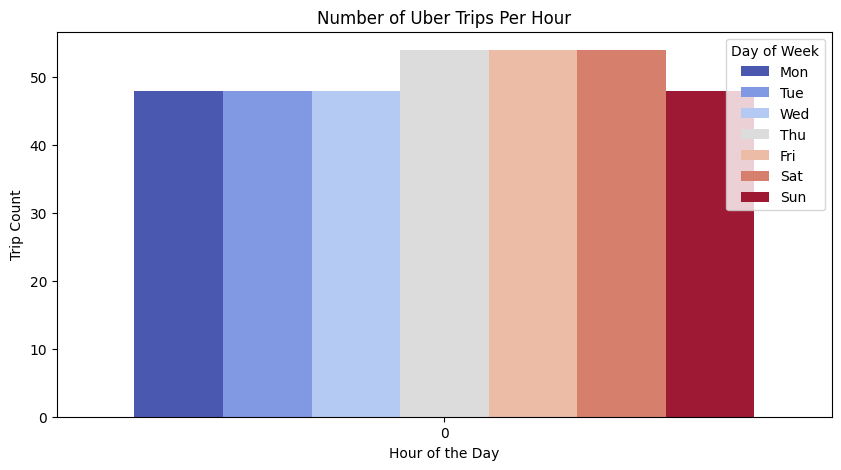

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Hour'], hue=df['DayOfWeek'], palette="coolwarm")
plt.title("Number of Uber Trips Per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Trip Count")
plt.legend(title="Day of Week", labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()


In [11]:
# Check the column names in the dataset
print(df.columns)


Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips', 'Hour',
       'Day', 'DayOfWeek', 'Month'],
      dtype='object')


# Plot number of trips per day of the week, colored by Month (for example)

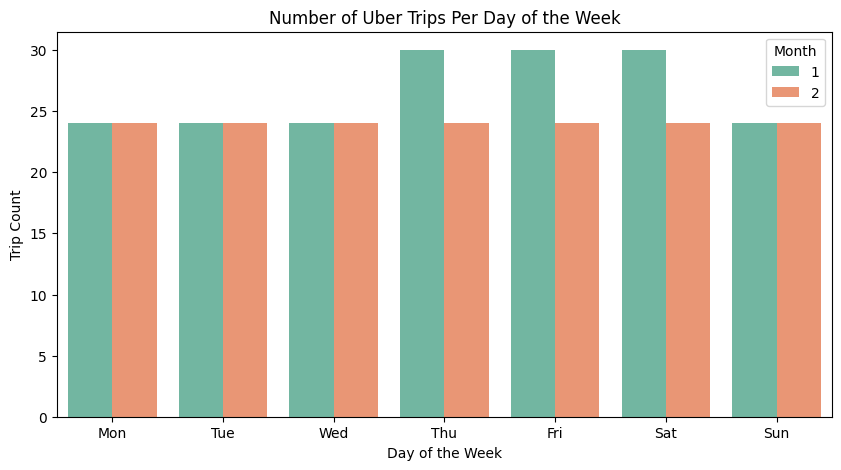

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['DayOfWeek'], hue=df['Month'], palette="Set2")
plt.title("Number of Uber Trips Per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Trip Count")
plt.xticks(ticks=np.arange(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()


# Plot number of trips per month with hue for coloring (if you want categories)

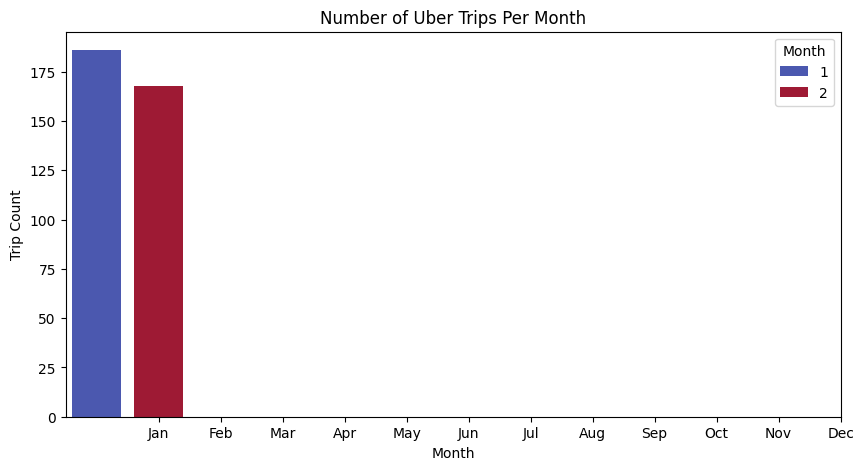

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Month'], hue=df['Month'], palette="coolwarm")
plt.title("Number of Uber Trips Per Month")
plt.xlabel("Month")
plt.ylabel("Trip Count")
plt.xticks(ticks=np.arange(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


# Plot active vehicles per hour

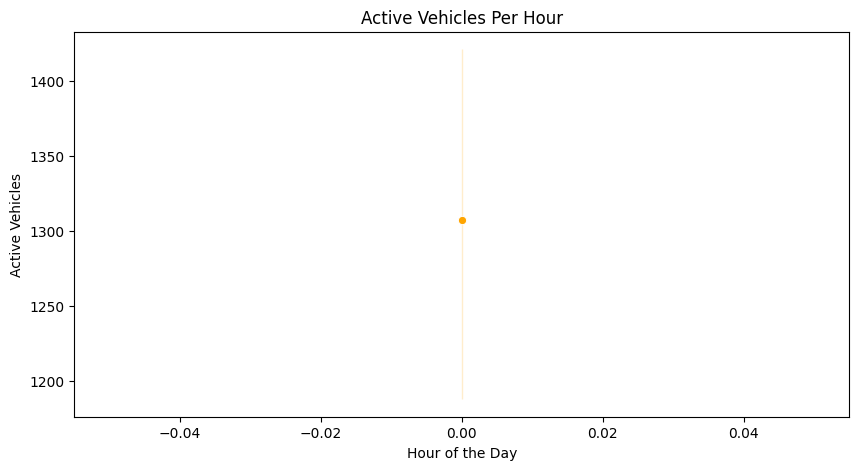

In [15]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['Hour'], y=df['active_vehicles'], marker='o', color='orange')
plt.title("Active Vehicles Per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Active Vehicles")
plt.show()


# Plot active vehicles per day of the week with hue for coloring

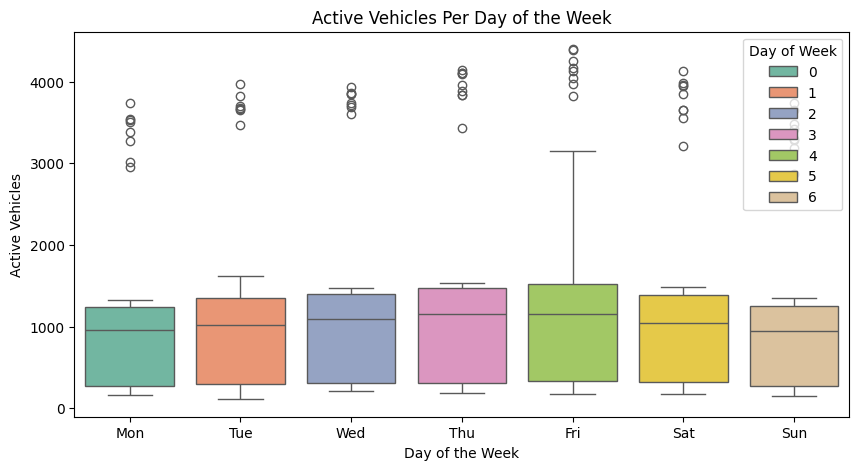

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['DayOfWeek'], y=df['active_vehicles'], hue=df['DayOfWeek'], palette="Set2")
plt.title("Active Vehicles Per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Active Vehicles")
plt.xticks(ticks=np.arange(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.legend(title="Day of Week")
plt.show()


# Plot trips vs active vehicles

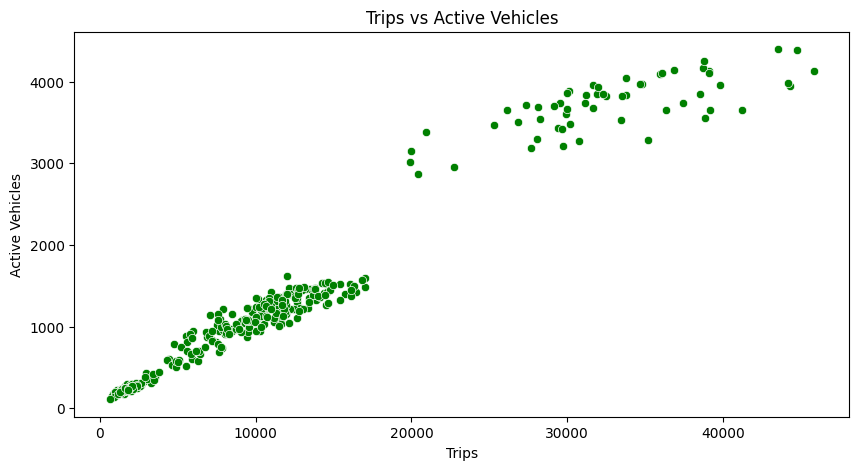

In [25]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['trips'], y=df['active_vehicles'], color='green')
plt.title("Trips vs Active Vehicles")
plt.xlabel("Trips")
plt.ylabel("Active Vehicles")
plt.show()


# Plot active vehicles trend over time (by date)

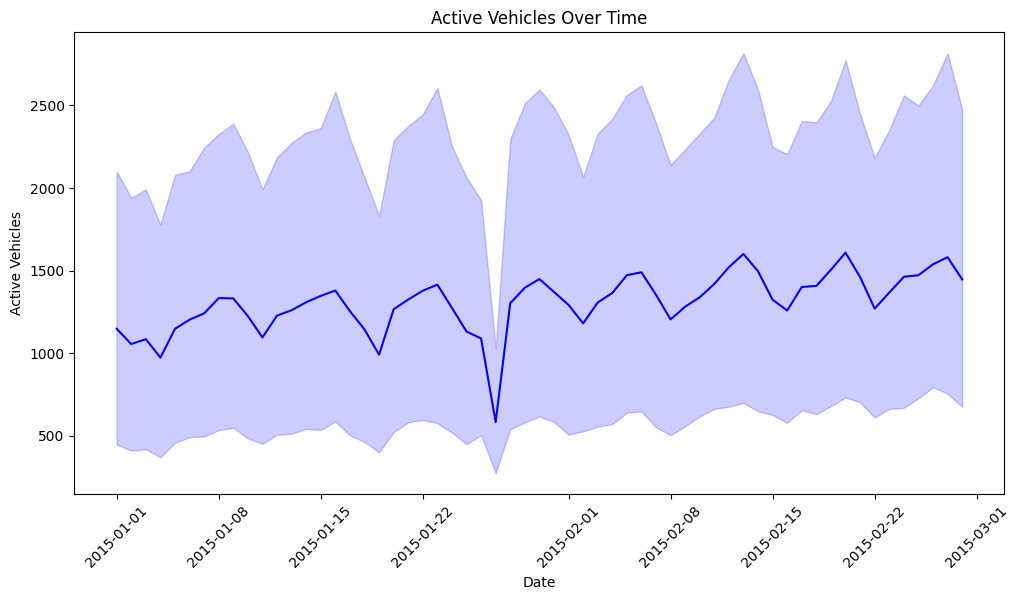

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['date'], y=df['active_vehicles'], color='blue')
plt.title("Active Vehicles Over Time")
plt.xlabel("Date")
plt.ylabel("Active Vehicles")
plt.xticks(rotation=45)
plt.show()


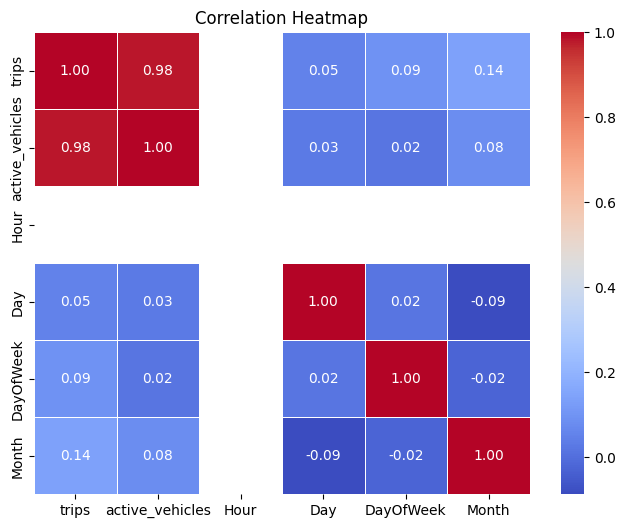

In [27]:
# Compute correlations between numerical features
correlation_matrix = df[['trips', 'active_vehicles', 'Hour', 'Day', 'DayOfWeek', 'Month']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [28]:
# Add weekday name
df['Weekday'] = df['date'].dt.strftime('%A')  # Converts DayOfWeek to full weekday name (e.g., Monday, Tuesday)

# Add Weekend flag (1 for weekend, 0 for weekday)
df['Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Display the first few rows to verify
print(df[['DayOfWeek', 'Weekday', 'Weekend']].head())


   DayOfWeek   Weekday  Weekend
0          3  Thursday        0
1          3  Thursday        0
2          3  Thursday        0
3          3  Thursday        0
4          3  Thursday        0


In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the 'trips' and 'active_vehicles' columns
df['scaled_trips'] = scaler.fit_transform(df[['trips']])
df['scaled_active_vehicles'] = scaler.fit_transform(df[['active_vehicles']])

# Display the first few rows to verify
print(df[['trips', 'scaled_trips', 'active_vehicles', 'scaled_active_vehicles']].head())


   trips  scaled_trips  active_vehicles  scaled_active_vehicles
0   1132     -0.990791              190               -0.962586
1   1765     -0.931261              225               -0.932436
2  29421      1.669641             3427                1.825846
3   7679     -0.375080              945               -0.312211
4   9537     -0.200345             1228               -0.068427


# Predictive Modeling

In [30]:
from sklearn.model_selection import train_test_split

# Select features and target
X = df[['active_vehicles', 'Hour', 'DayOfWeek', 'Month', 'Weekend']]  # Features
y = df['trips']  # Target (number of trips)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print(f"Training Set Size: {X_train.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")


Training Set Size: 283
Testing Set Size: 71


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Display the model's performance metrics
print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


Model Performance:
Mean Absolute Error (MAE): 1111.8851978507662
Mean Squared Error (MSE): 2487470.123943445
R-squared: 0.9769314775935857


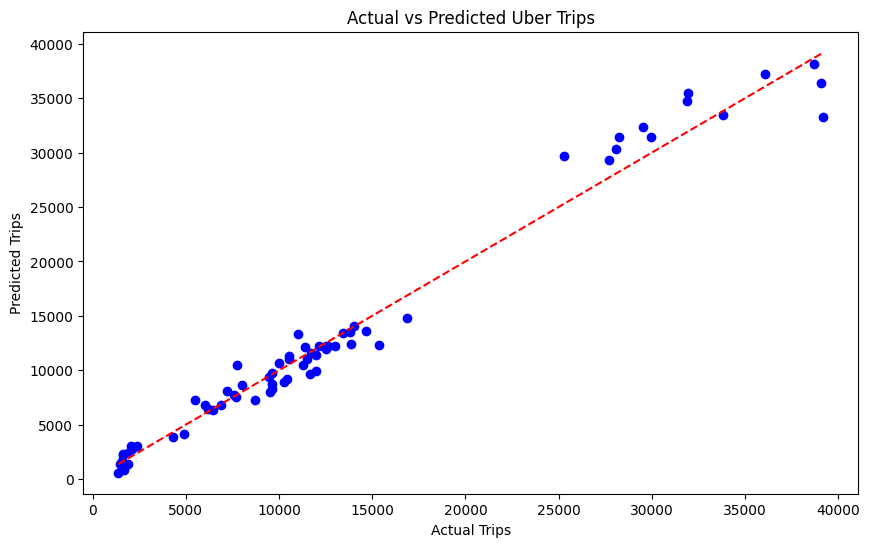

In [32]:
# Plot actual vs predicted trips
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.title("Actual vs Predicted Uber Trips")
plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.show()


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Predict on the test set using the best model
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R-squared: {r2_score(y_test, y_pred_rf)}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Model Performance:
MAE: 925.6039423517923
MSE: 1762135.0763385603
R-squared: 0.9836581544838008


In [34]:
from sklearn.model_selection import cross_val_score

# Evaluate model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Mean MAE from cross-validation: {-cv_scores.mean()}")


Mean MAE from cross-validation: 1243.8186067973807


C:\Users\91834\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91834\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91834\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91834\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

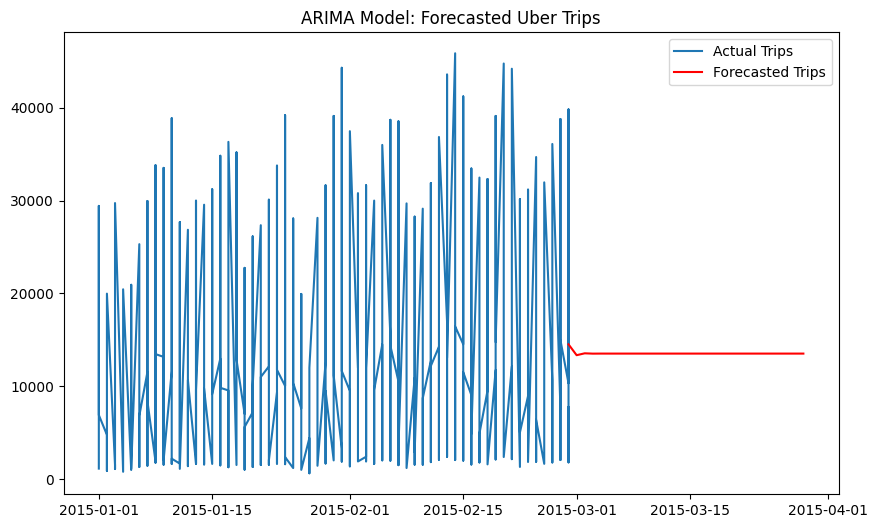

In [35]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare time series data (using 'date' as the index)
df.set_index('date', inplace=True)

# Fit ARIMA model (adjust parameters based on your data)
arima_model = ARIMA(df['trips'], order=(1,1,1))  # (p,d,q) parameters
arima_model_fit = arima_model.fit()

# Make predictions
forecast = arima_model_fit.forecast(steps=30)  # Forecast the next 30 days

# Plot the forecasted trips
plt.figure(figsize=(10,6))
plt.plot(df.index, df['trips'], label='Actual Trips')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast, label='Forecasted Trips', color='red')
plt.legend()
plt.title('ARIMA Model: Forecasted Uber Trips')
plt.show()


In [36]:
import joblib

# Save the trained Random Forest model (or any model)
joblib.dump(best_rf_model, 'uber_trip_predictor_model.pkl')


['uber_trip_predictor_model.pkl']